In [33]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

import io
%matplotlib inline


In [34]:
# eu = pd.read_csv('./data/us_euro_daily_exrate.csv', parse_dates=[0])
eu = pd.read_csv('./data/mf_weekly_data_use.csv', parse_dates=[0])
df_test_scores = pd.read_csv('./data/test_scores.csv', parse_dates=[1])

In [35]:
eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 6 columns):
Date             822 non-null datetime64[ns]
Rate             822 non-null float64
USintRate        822 non-null float64
EUInterest       822 non-null float64
Import Energy    822 non-null float64
Export Energy    822 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 38.6 KB


In [36]:
# #data_to_use=btc['Value'].values
period = 'Weekly'
col='Import Energy'
data_df = eu[~eu[col].isnull()]
eu_rates = data_df[col].astype(float)
# # eu_rates = eu['Value'].astype(float)
data_to_use=eu_rates.values
# data_to_use
len(data_to_use)

822

In [37]:
data_df_use = data_df.drop('Date', axis=1)

In [38]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df_use)


In [39]:
scaled_data

array([[ 2.86426018,  1.55453548,  2.30259827, -0.21288874, -0.87276895],
       [ 2.75315525,  1.52233685,  2.30259827, -0.748354  , -0.87276895],
       [ 2.50271381,  1.44506015,  2.30259827, -0.31422679, -0.87276895],
       ...,
       [ 0.28425796, -0.08759436, -1.15623524, -1.05049152,  3.21735174],
       [ 0.19592044, -0.04895601, -1.15623524, -1.48524426,  3.43384724],
       [ 0.21231297, -0.04895601, -1.15623524, -1.44145622,  2.79737787]])

In [40]:
scaled_data[:,0]

array([ 2.86426018,  2.75315525,  2.50271381,  2.55644488,  2.58467646,
        2.63567545,  2.46628596,  2.5746588 ,  2.5746588 ,  2.49998172,
        2.5983369 ,  2.69942418,  2.77501196,  2.64387171,  2.75861943,
        2.85788531,  2.95077632,  2.73220924,  2.79322588,  2.63567545,
        2.84058208,  2.88884898,  2.74586968,  2.79322588,  2.86334949,
        3.08829144,  3.13929042,  3.0017753 ,  2.99813252,  2.96534746,
        3.09193422,  2.97172233,  2.88793828,  2.92527683,  2.90888429,
        2.92436613,  2.80688633,  2.70762044,  2.53732026,  2.55644488,
        2.4580897 ,  2.44351856,  2.31784249,  2.20400547,  2.20491616,
        1.94992124,  1.80603125,  1.92533244,  1.76140713,  1.5328224 ,
        1.78144245,  1.78144245,  1.94081428,  1.82515587,  1.92988592,
        1.85338745,  1.81878099,  1.91349339,  1.82242378,  1.88526181,
        1.83881631,  1.80785264,  1.94718915,  1.89072599,  1.6994798 ,
        1.54830423,  1.59930322,  1.70403328,  1.73499695,  1.60

In [41]:
data_m30= pd.DataFrame(scaled_data[:,0]).rolling(window=4).mean()

data_m30_ex= pd.DataFrame(scaled_data[:,0]).rolling(window=4).mean()
data_m30_us_int= pd.DataFrame(scaled_data[:,1]).rolling(window=4).mean()
data_m30_eu_int= pd.DataFrame(scaled_data[:,2]).rolling(window=4).mean()
data_m30_oim= pd.DataFrame(scaled_data[:,3]).rolling(window=4).mean()
data_m30_oex= pd.DataFrame(scaled_data[:,4]).rolling(window=4).mean()



# data_m30 = scaled_data[col].rolling(window=4).mean()
# data_m50 = scaled_data[col].rolling(window=8).mean()
# data_m100 = scaled_data[col].rolling(window=12).mean()
# data_m200 = scaled_data[col].rolling(window=24).mean()


In [42]:
#data preprocessing(scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))
# scaled_weekly_data = scaler.fit_transform(eu_weekly_arr_to_use.reshape(-1, 1))
# scaled_monthly_data = scaler.fit_transform(eu_monthly_arr_to_use.reshape(-1, 1))
# scaled_yearly_data = scaler.fit_transform(eu_yearly_arr_to_use.reshape(-1, 1))
scaled_data_m30 = scaler.fit_transform(data_m30.values.reshape(-1,1))
scaled_data_m50 = scaler.fit_transform(data_m50.values.reshape(-1,1))
scaled_data_m100 = scaler.fit_transform(data_m100.values.reshape(-1,1))
scaled_data_m200 = scaler.fit_transform(data_m200.values.reshape(-1,1))


#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title(period+' ' + col + ' 1999 to 2017')
plt.xlabel(period)
plt.ylabel('Scaled Exchage')
plt.plot(scaled_data, label=period+' '+col)
plt.plot(scaled_data_m30, label='30 Day MA')
plt.plot(scaled_data_m50, label='50 Day MA')
plt.plot(scaled_data_m200, label='200 Day MA')

# plt.plot(scaled_weekly_data, label='Weekly Rate')
# plt.plot(scaled_monthly_data, label = 'Monthly Rate')
# plt.plot(scaled_yearly_data, label = 'Monthly Rate')
plt.legend()
plt.show()

NameError: name 'data_m50' is not defined

In [43]:
len(scaled_data_m30), len(scaled_data)

(822, 822)

In [44]:
idx=7
# sqrt(mean_squared_error(scaled_data[idx:],data_m30[~(data_m30.isnull())].values)
data_m30_ex.reset_index()
# data_m30[~(data_m30.key.isnull())]
len(data_m30_ex[~data_m30_ex[0].isnull()].values)


819

In [45]:
eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 6 columns):
Date             822 non-null datetime64[ns]
Rate             822 non-null float64
USintRate        822 non-null float64
EUInterest       822 non-null float64
Import Energy    822 non-null float64
Export Energy    822 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 38.6 KB


In [46]:
idx=3
rsme_ma30_ex = sqrt(mean_squared_error(scaled_data[idx:],data_m30_ex[~(data_m30_ex[0].isnull())].values))
rsme_ma30_us_int = sqrt(mean_squared_error(scaled_data[idx:],data_m30_us_int[~(data_m30_us_int[0].isnull())].values))
rsme_ma30_eu_int = sqrt(mean_squared_error(scaled_data[idx:],data_m30_eu_int[~(data_m30_eu_int[0].isnull())].values))
rsme_ma30_oim = sqrt(mean_squared_error(scaled_data[idx:],data_m30_oim[~(data_m30_oim[0].isnull())].values))
rsme_ma30_oex = sqrt(mean_squared_error(scaled_data[idx:],data_m30_oex[~(data_m30_oex[0].isnull())].values))

rsme_ma30_ex, rsme_ma30_us_int, rsme_ma30_eu_int, rsme_ma30_oim, rsme_ma30_oex

(1.5610720666722773,
 0.804490558123061,
 0.8244176073852018,
 0.29923853130485656,
 1.8502985477613)

In [51]:
df_MA_rsme = pd.DataFrame([rsme_ma30_ex, rsme_ma30_us_int, rsme_ma30_eu_int])

In [52]:
df_RNN_rsme = pd.DataFrame([0.06021820350069773,0.006940731038477763,
                            0.0008876598981210502])

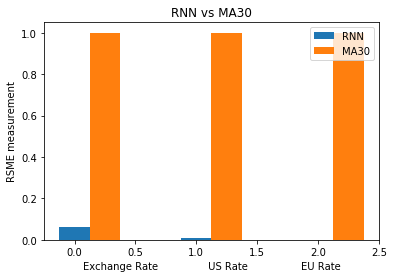

In [66]:

#index = np.arange(5)
index_msure=['extra        ','Exchange Rate', 'US Rate', 'EU Rate']
bar_width = 0.25
fig, ax = plt.subplots()
rnn_bar = ax.bar(df_RNN_rsme.index, df_RNN_rsme[0].values, bar_width, label="RNN")


ma30_bar = ax.bar(df_MA_rsme.index + bar_width,df_MA_rsme[0].value_counts(), bar_width, label="MA30")
#ax.set_xlabel(index_msure)
ax.set_ylabel('RSME measurement')
ax.set_title('RNN vs MA30')
ax.set_xlabel("Exchange Rate                US Rate                 EU Rate")
ax.legend()
plt.plot(figsize=(20,10))
plt.show()



In [57]:
str(df_RNN_rsme.index.values.to)


AttributeError: 'numpy.ndarray' object has no attribute 'to'

In [ ]:
df_test_scores = pd.rea('./data/test_scores.csv')